#####SetUP

In [ ]:
# @title uoload_files
from google.colab import files
#files.upload()


In [ ]:
# @title Install Library
!pip install peft datasets transformers accelerate diffusers trimesh
#!pip install torch_xla
!git clone https://github.com/openai/shap-e.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 707.0/707.0 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
Cloning into 'shap-e'...
remote: Enumerating objects: 336, done.
remote: Counting 

In [ ]:
# @title Load&Setting
Device = "GPU" # @param ["GPU","TPU"]
from peft import get_peft_config, get_peft_model, get_peft_model_state_dict, LoraConfig, TaskType
import torch
from datasets import load_dataset
import os
#import torch_xla.core.xla_model as xm

os.environ["TOKENIZERS_PARALLELISM"] = "false"
from transformers import AutoTokenizer
from torch.utils.data import DataLoader
from transformers import default_data_collator, get_linear_schedule_with_warmup
from tqdm import tqdm
from datasets import load_dataset

import torch


if Device == "GPU":
    device = "cuda"
# elif Device == "TPU":
#     device = xm.xla_device()

model_name_or_path = "openai/shap-e"
#tokenizer_name_or_path = "openai/clip-vit-base-patch16"

checkpoint_name = "shap-e_lora_v1.pt"
text_column = "text"
# label_column = "text_label"
max_length = 128

#####loading

In [ ]:
# @title LoadModel
from diffusers import ShapEPipeline

# 事前学習済みモデル名
model_name = "openai/shap-e"

# 1. ShapEPipeline をロード
pipeline = ShapEPipeline.from_pretrained(model_name)

# 2. モデルを取得
model = pipeline# Renderer モデル
print("********model********")
print(model)
print("******renderer*******")
model.shap_e_renderer

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/458 [00:00<?, ?B/s]

Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/276 [00:00<?, ?B/s]

prior/config.json:   0%|          | 0.00/489 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/626 [00:00<?, ?B/s]

renderer/config.json:   0%|          | 0.00/496 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

shap_e_renderer/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/905M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/905M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/495M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

The config attributes {'renderer': ['shap_e', 'ShapERenderer']} were passed to ShapEPipeline, but are not expected and will be ignored. Please verify your model_index.json configuration file.
Keyword arguments {'renderer': ['shap_e', 'ShapERenderer']} are not expected by ShapEPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--openai--shap-e/snapshots/7bd337afdea1c17842e1c3cc45c4e268356dba40/shap_e_renderer: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--openai--shap-e/snapshots/7bd337afdea1c17842e1c3cc45c4e268356dba40/shap_e_renderer.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--openai--shap-e/snapshots/7bd337afdea1c17842e1c3cc45c4e268356dba40/prior: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--openai--shap-e/snapshots/7bd337afdea1c17842e1c3cc45c4e268356dba40/prior.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


********model********
ShapEPipeline {
  "_class_name": "ShapEPipeline",
  "_diffusers_version": "0.32.2",
  "_name_or_path": "openai/shap-e",
  "prior": [
    "diffusers",
    "PriorTransformer"
  ],
  "scheduler": [
    "diffusers",
    "HeunDiscreteScheduler"
  ],
  "shap_e_renderer": [
    "shap_e",
    "ShapERenderer"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ]
}

******renderer*******


ShapERenderer(
  (params_proj): ShapEParamsProjModel(
    (projections): ModuleDict(
      (nerstf__mlp__0__weight): ChannelsProj(
        (proj): Linear(in_features=1024, out_features=23808, bias=True)
        (norm): LayerNorm((93,), eps=1e-05, elementwise_affine=True)
      )
      (nerstf__mlp__1__weight): ChannelsProj(
        (proj): Linear(in_features=1024, out_features=65536, bias=True)
        (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      )
      (nerstf__mlp__2__weight): ChannelsProj(
        (proj): Linear(in_features=1024, out_features=65536, bias=True)
        (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      )
      (nerstf__mlp__3__weight): ChannelsProj(
        (proj): Linear(in_features=1024, out_features=65536, bias=True)
        (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      )
    )
  )
  (mlp): MLPNeRSTFModel(
    (mlp): ModuleList(
      (0): Linear(in_features=93, out_features=256, bias=True)
      (1-3)

In [ ]:
# @title Adapt LoRA
target_modules = "mlp" # @param {"type":"string","placeholder":"proj"}
r = 16 # @param {"type":"number","placeholder":"8"}
lora_alpha = 32 # @param {"type":"number","placeholder":"lora_alpha"}
lora_dropout = 0.1 # @param {"type":"number","placeholder":"lora_dropout"}


from transformers import AutoModelForPreTraining
import torch.nn.init as init

# creating model
peft_config = LoraConfig(
    target_modules=["mlp.0","mlp.1","mlp.2","mlp.3","mlp.4","mlp.5"],
    inference_mode=False,
    r=r,
    lora_alpha=lora_alpha,
    lora_dropout=lora_dropout
    )
model.shap_e_renderer = get_peft_model(model.shap_e_renderer, peft_config)
for name, param in model.shap_e_renderer.named_parameters():
    if "lora_B" in name:
        print(f"{name}: mean={param.mean().item()}, std={param.std().item()}")



model.shap_e_renderer.print_trainable_parameters()
model.shap_e_renderer

base_model.model.mlp.mlp.0.lora_B.default.weight: mean=0.0, std=0.0
base_model.model.mlp.mlp.1.lora_B.default.weight: mean=0.0, std=0.0
base_model.model.mlp.mlp.2.lora_B.default.weight: mean=0.0, std=0.0
base_model.model.mlp.mlp.3.lora_B.default.weight: mean=0.0, std=0.0
base_model.model.mlp.mlp.4.lora_B.default.weight: mean=0.0, std=0.0
base_model.model.mlp.mlp.5.lora_B.default.weight: mean=0.0, std=0.0
trainable params: 47,360 || all params: 226,344,646 || trainable%: 0.0209


PeftModel(
  (base_model): LoraModel(
    (model): ShapERenderer(
      (params_proj): ShapEParamsProjModel(
        (projections): ModuleDict(
          (nerstf__mlp__0__weight): ChannelsProj(
            (proj): Linear(in_features=1024, out_features=23808, bias=True)
            (norm): LayerNorm((93,), eps=1e-05, elementwise_affine=True)
          )
          (nerstf__mlp__1__weight): ChannelsProj(
            (proj): Linear(in_features=1024, out_features=65536, bias=True)
            (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          )
          (nerstf__mlp__2__weight): ChannelsProj(
            (proj): Linear(in_features=1024, out_features=65536, bias=True)
            (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          )
          (nerstf__mlp__3__weight): ChannelsProj(
            (proj): Linear(in_features=1024, out_features=65536, bias=True)
            (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          )
        )

In [ ]:
# @title install trainedparameter
import zipfile
with zipfile.ZipFile("lora_param.zip", 'r') as zip_ref:
    zip_ref.extractall("/content")

for i in range(6):  # mlp.0 ~ mlp.5 の層をループ
    layer_name_A = f"base_model.model.mlp.mlp.{i}.lora_A.default.weight"
    layer_name_B = f"base_model.model.mlp.mlp.{i}.lora_B.default.weight"

    loaded_weight_A = torch.load(f"lora/mlp_{i}_lora_A_weight.pt", weights_only=True)
    loaded_weight_B = torch.load(f"lora/mlp_{i}_lora_B_weight.pt", weights_only=True)

    print(model.shap_e_renderer.state_dict()[layer_name_A].shape)
    print(loaded_weight_A.shape)
    print(model.shap_e_renderer.state_dict()[layer_name_B].shape)
    print(loaded_weight_B.shape)
    with torch.no_grad():
        model.shap_e_renderer.state_dict()[layer_name_A].copy_(loaded_weight_A)
        model.shap_e_renderer.state_dict()[layer_name_B].copy_(loaded_weight_B)

#####play

  0%|          | 0/127 [00:00<?, ?it/s]

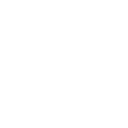

In [ ]:
from diffusers.utils import export_to_gif
from IPython.display import Image
guidance_scale = 15.0
prompt = "a black airplane"
model.to(device)
images = model(
    prompt,
    guidance_scale=guidance_scale,
    num_inference_steps=64,
    frame_size=128,
).images

gif_path = export_to_gif(images[0], "test.gif")
Image(gif_path, format='png')

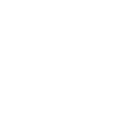

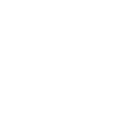

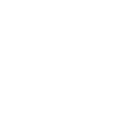

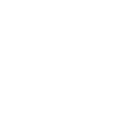

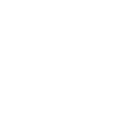

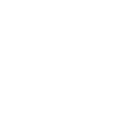

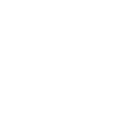

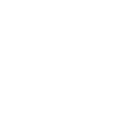

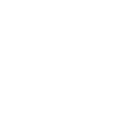

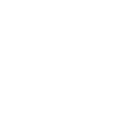

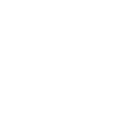

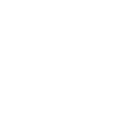

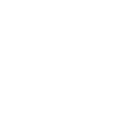

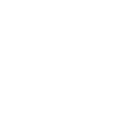

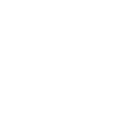

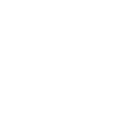

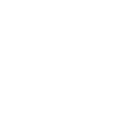

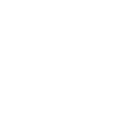

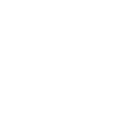

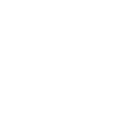

In [ ]:
from IPython.display import display
for i in range(len(images[0])):
  display(images[0][i])